# Inicialització


In [25]:
# Importació de les biblioteques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, ConfusionMatrixDisplay

In [26]:
from os.path import exists
from os import makedirs

ruta = '/content/sample_data/IOC/IABD/M2/data'
if not exists(ruta):
    makedirs(ruta)

ruta = ruta+'/diamant.csv'

if not exists(ruta):
  !wget -O "/content/sample_data/IOC/IABD/M2/data/diamant.csv" "private address"

diamant_df = pd.read_csv(ruta)
diamant_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [27]:
cat_cols = diamant_df.select_dtypes(include=object).columns.to_list()
num_cols = diamant_df.select_dtypes(exclude=object).columns.to_list()

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cat_cols:
  diamant_df[col]=label_encoder.fit_transform(diamant_df[col])

In [28]:
x = diamant_df.drop('price', axis=1)
y = diamant_df['price']

# Definició metodes a fer servir amb els diferents models

In [24]:
def Logistic_Regression(x_train, y_train, x_test, y_test, multi_class='auto', solver='lbfgs', max_iter=10000, penalty='l2'):
  """
  multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
  penalty{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
  Specify the norm of the penalty:
  None: no penalty is added;
  'l2': add a L2 penalty term and it is the default choice;
  'l1': add a L1 penalty term;
  'elasticnet': both L1 and L2 penalty terms are added.

  solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
  ‘lbfgs’ - [‘l2’, None]
  ‘liblinear’ - [‘l1’, ‘l2’]
  ‘newton-cg’ - [‘l2’, None]
  ‘newton-cholesky’ - [‘l2’, None]
  ‘sag’ - [‘l2’, None]
  ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]
  """
  try:
    classificador = LogisticRegression(multi_class=multi_class, solver=solver, max_iter=max_iter, penalty=penalty)
    classificador.fit(x_train, y_train)
    prediccions = classificador.predict(x_test)
    ConfusionMatrixDisplay.from_predictions(y_test, prediccions);

    # Càlcul mètriques
    accuracy = accuracy_score(y_test, prediccions)
    precision = precision_score(y_test, prediccions, average='weighted')

    # Mostra  mètriques
    print("LogisticRegression")
    print(f"Exactitud: {accuracy:.4f}")
    print(f"Precisió: {precision:.4f}")
  except Exception as ex:
    print(f"LogsiticRegression failed {ex}")

def SGD_Classifier(x_train, y_train, x_test, y_test, loss='hinge', penalty='l2', alpha=0.0001):
  """
  loss{‘hinge’, ‘log_loss’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’, ‘squared_error’, ‘huber’,
  ‘epsilon_insensitive’, ‘squared_epsilon_insensitive’}, default=’hinge’

  ‘hinge’ gives a linear SVM.
  ‘log_loss’ gives logistic regression, a probabilistic classifier.
  ‘modified_huber’ is another smooth loss that brings tolerance to outliers as well as probability estimates.
  ‘squared_hinge’ is like hinge but is quadratically penalized.
  ‘perceptron’ is the linear loss used by the perceptron algorithm.
  The other losses, ‘squared_error’, ‘huber’, ‘epsilon_insensitive’ and ‘squared_epsilon_insensitive’ are designed
  for regression but can be useful in classification as well; see SGDRegressor for a description.

  penalty{‘l2’, ‘l1’, ‘elasticnet’, None}, default=’l2’
  The penalty (aka regularization term) to be used. Defaults to ‘l2’ which is the standard regularizer for linear SVM models.
  ‘l1’ and ‘elasticnet’ might bring sparsity to the model (feature selection) not achievable with ‘l2’.
  No penalty is added when set to None.
  alphafloat, default=0.0001
  Constant that multiplies the regularization term. The higher the value, the stronger the regularization.
  Also used to compute the learning rate when learning_rate is set to ‘optimal’. Values must be in the range [0.0, inf).

  """
  try:
    classificador = SGDClassifier(loss=loss, penalty=penalty, alpha=alpha)
    classificador.fit(x_train, y_train)
    prediccions = classificador.predict(x_test)
    ConfusionMatrixDisplay.from_predictions(y_test, prediccions);

    # Càlcul mètriques
    accuracy = accuracy_score(y_test, prediccions)
    precision = precision_score(y_test, prediccions, average='weighted')

    # Mostra  mètriques
    print("SGDClassifier")
    print(f"Exactitud: {accuracy:.4f}")
    print(f"Precisió: {precision:.4f}")
  except Exception as ex:
    print(f"SDGClassifier failed {ex}")


# Primera execució
La primera observació es que LogisticRegression obté millors resultats que SGDClassifier amb els valors per defecte
LogisticRegression
Exactitud: 0.8052
Precisió: 0.8112
SGDClassifier
Exactitud: 0.5292
Precisió: 0.7538

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.3, random_state=42)
Logistic_Regression(x_train, y_train, x_test, y_test )
SGD_Classifier(x_train, y_train, x_test, y_test)

KeyboardInterrupt: 

# Optimització amb minmax



x['age'].hist()      -> MinMax

x['cp'].hist()       -> 4 categories

x['trestbps'].hist() -> MinMax

x['chol'].hist()     -> MinMax

x['fbs'].hist()      -> 2 categories

x['restecg'].hist()  -> 3 categories

x['thalach'].hist()  -> MinMax

x['exang'].hist()    -> 0.0-0.1 i 0.9-1 2 categories

x['oldpeak'].hist()  -> 0-5 desv 6, va de 0 a 6 disminuint  incremental

x['slope'].hist()    -> 3 categories

x['ca'].hist()       -> 5 categories descendents incremental

x['thal'].hist()     -> 4 categories ascendent incremental

LogisticRegression
Exactitud: 0.8052
Precisió: 0.8112
SGDClassifier
Exactitud: 0.5877
Precisió: 0.7340


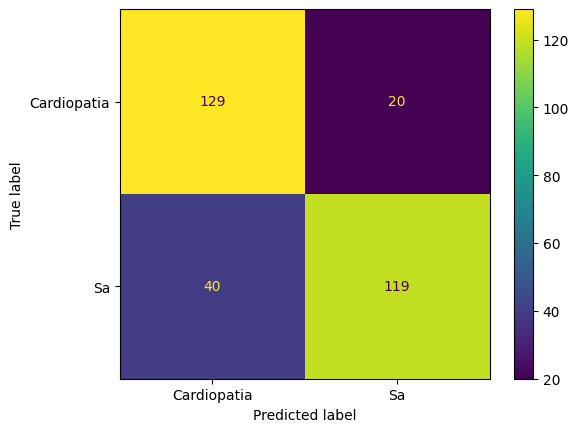

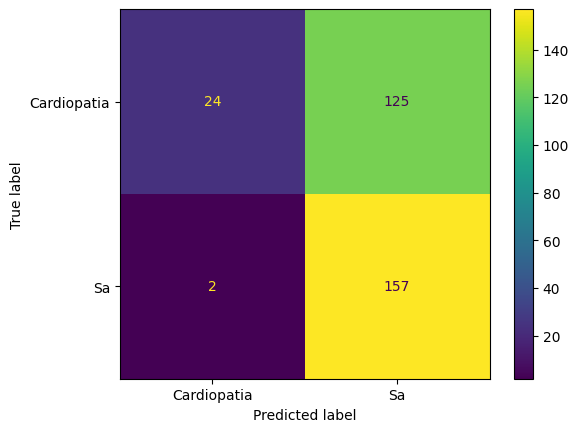

In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm_df = x.copy()
scaler = MinMaxScaler()
columnes_normalized = ['age','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
norm_df[columnes_normalized] = scaler.fit_transform(x[columnes_normalized])

x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.3, random_state=42)
Logistic_Regression(x_train, y_train, x_test, y_test, 'multinomial', penalty='l2', solver='lbfgs' )
SGD_Classifier(x_train, y_train, x_test, y_test)

# Observació de dades

Els valors de correlació ens ajuden a identificar quines variables són importants
i com influeixen en la variable dependent

<ipython-input-9-d8c701c272b3>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cardio_df.corr()


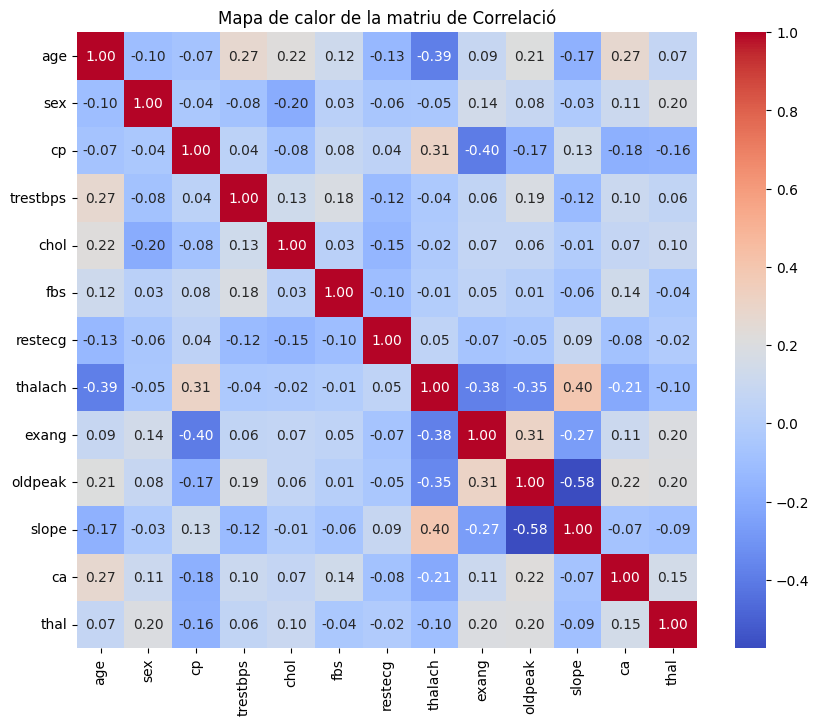

In [ ]:
# Crea el mapa de calor de la matriu de correlació

import seaborn as sns

# Calcula la matriu de correlació
correlation_matrix = x.corr()

"""
En el mapa de calor o (heatmap), els valors més propers a 1 indiquen una correlació positiva forta,
els valors més propers a -1 indiquen una correlació negativa forta
i els valors propers a 0 indiquen una correlació feble o nul·la.
"""

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de la matriu de Correlació')
plt.show()

De la matriu de correlació podem observar que els valors que tenen major relació son
* slope amb thalach
* oldpeak amb exang
* thalach amb cp

La resta comencen a tenir molt poca relació fins i tot nula

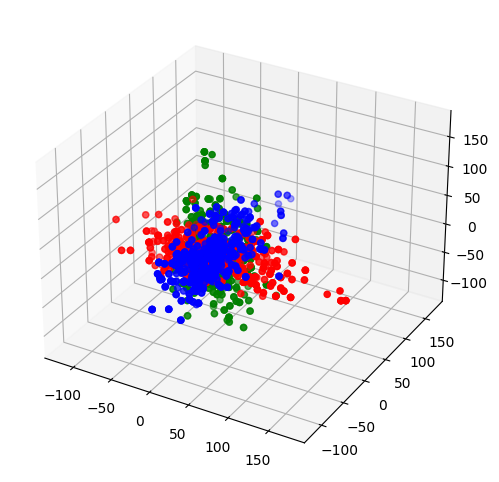

['chol', 'thalach', 'trestbps']


In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
# Divisió prèvia de les dades del dataframe. X seran les característiques i y serà la columna objectiu

# Divisió del 70% de les dades per a l'entrenament i el 30% per al test
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.3, random_state=42)

# Normalització de les les dades
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)
# data_scaled = pd.DataFrame(preprocessing.scale(x_train), columns = x_train.columns)

"""
L'ús de PCA(n_components=3) indica PCA amb tres components principals com a resultat.
"""
# Inicialitzar i ajustar PAC
pca = PCA(n_components=3)  # Reduir a 3 components per visualitzar
model = pca.fit(x_train)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Obtenir els tres components principals
pca = pd.DataFrame(data=x_train_pca, columns=['PC-1', 'PC-2','PC-3'])

# Assignar un color diferent a cada component
colors = ['red', 'green', 'blue']

# Crear la figura 3D amb colors diferents per a cada component
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar els components en 3D amb colors diferents per a cada component
for i in range(3):
    ax.scatter(pca.iloc[:, i], pca.iloc[:, (i + 1) % 3], pca.iloc[:, (i + 2) % 3], c=colors[i], label=f'Component {i+1}')
plt.show()

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
n_pcs= model.components_.shape[0]
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
# get the names
most_important_names = [x_train.columns[most_important[i]] for i in range(n_pcs)]
print(most_important_names)
# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(sorted(dic.items()))

Comn es pot observar es veu una pilota gegant amb les dades barrejades, també es pot observar dades molt dispars o que s'allunyen de la majoría, aixó pot indicar que s'hauria de netejar i fer servir aquestes mostres com a tests i part de la resta de dades com a entrenament.

# Conclusió

Haix d'invertir una mica mes de temps en fer servir técniques d'exploració de dades, relació entre les dades, fer servir altres técniques de normalització evaluació creuada.

Tenint en compte que el tipus de dades no son lineals, sino que son de resultat binari, aquest algoritme no es el mes indicat